<a href="https://colab.research.google.com/github/Kealfeyne/Samsung_Bootcamp_Classic_ML/blob/main/5_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install statsmodels==0.11.1

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
import statsmodels as sm

# Обработка данных

In [43]:
train = pd.read_csv('train.csv')
train.head()

,datetime,total
0,01.01.2005 00:00:00,NaN
1,01.01.2005 01:00:00,154139.8084
2,01.01.2005 02:00:00,157818.3593
3,01.01.2005 03:00:00,149310.6991
4,01.01.2005 04:00:00,138282.0380


In [44]:
train['datetime'] = pd.to_datetime(train['datetime'], format='%d.%m.%Y %H:%M:%S')
train.set_index(['datetime'], inplace=True)

In [45]:
train.head(3)

,total
datetime,
2005-01-01 00:00:00,NaN
2005-01-01 01:00:00,154139.8084
2005-01-01 02:00:00,157818.3593


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2005-01-01 00:00:00 to 2008-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   total   34946 non-null  float64
dtypes: float64(1)
memory usage: 547.9 KB


In [47]:
train.isna().sum()

total    118
dtype: int64

In [50]:
train.fillna(train['total'].mean(), inplace=True)

In [52]:
train.describe()

,total
count,35064.000000
mean,185124.542759
std,45499.991334
min,-2683.028891
25%,155984.203225
50%,195289.551900
75%,218306.779275
max,302203.609200


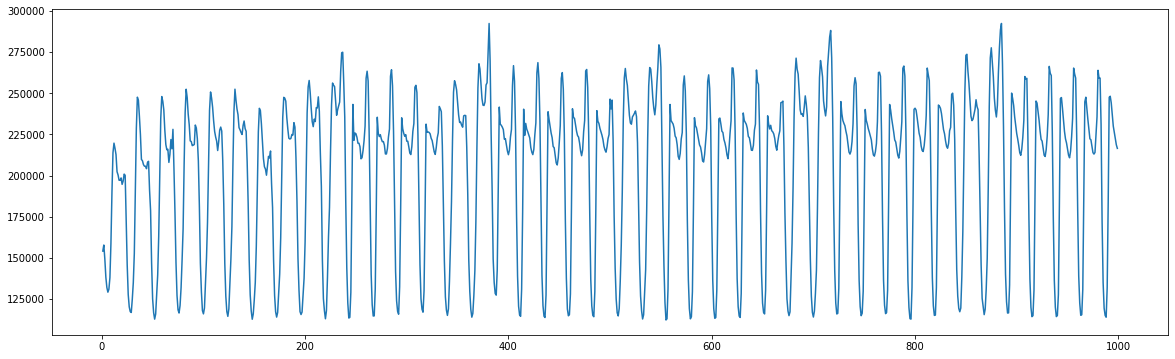

In [15]:
train['total'][:1000].plot(figsize = (20, 6))
plt.show()

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

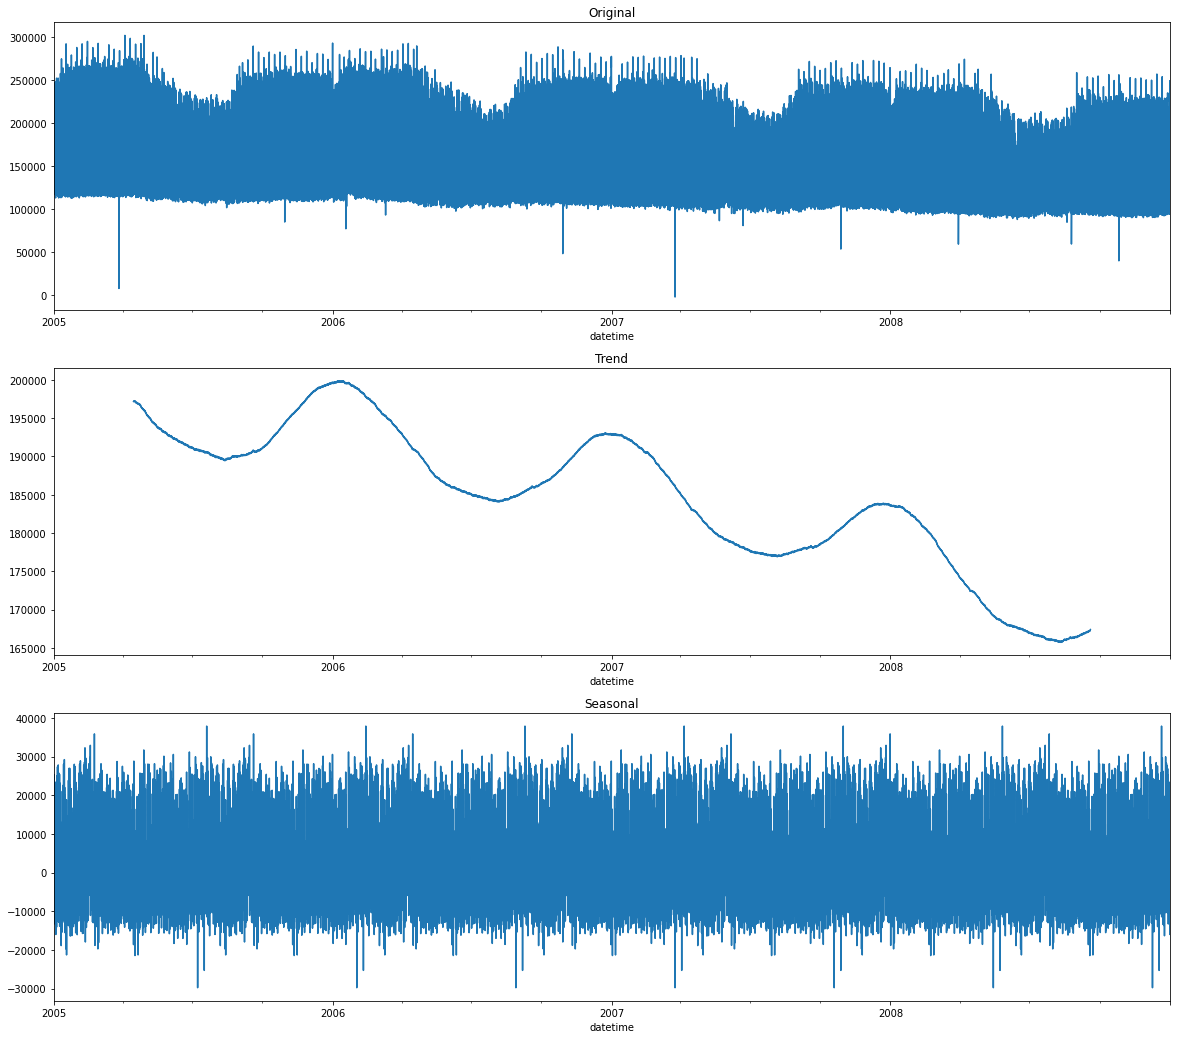

In [71]:
decompose = seasonal_decompose(train, period=5000)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20,18))
ax[0].set_title('Original')
ax[1].set_title('Trend')
ax[2].set_title('Seasonal')
decompose.observed.plot(ax=ax[0])
decompose.trend.plot(ax=ax[1])
decompose.seasonal.plot(ax=ax[2])
plt.show()

# Рассмотрим модели

In [210]:
from statsmodels.tsa.ar_model import AutoReg

In [211]:
from datetime import datetime

Обучение только на том сезоне, который предсказываем - 0.73

In [223]:
series = train[train.index < datetime(2005, 7, 1, 0, 0, 0)]
series = pd.concat([series, train[(train.index >= datetime(2006, 1, 1, 0, 0, 0))\
                        & (train.index < datetime(2006, 7, 1, 0, 0, 0))]])
series = pd.concat([series, train[(train.index >= datetime(2007, 1, 1, 0, 0, 0))\
                        & (train.index < datetime(2007, 7, 1, 0, 0, 0))]])
series = pd.concat([series, train[(train.index >= datetime(2008, 1, 1, 0, 0, 0))\
                        & (train.index < datetime(2008, 7, 1, 0, 0, 0))]])
series

,total
datetime,
2005-01-01 00:00:00,185124.542759
2005-01-01 01:00:00,154139.808400
2005-01-01 02:00:00,157818.359300
2005-01-01 03:00:00,149310.699100
2005-01-01 04:00:00,138282.038000
...,...
2008-06-30 19:00:00,180984.429000
2008-06-30 20:00:00,189818.264200
2008-06-30 21:00:00,199127.167500


In [250]:
model_auto_reg = AutoReg(series.total.values, lags=400).fit()
predictions = model_auto_reg.predict(start=series.shape[0], end=series.shape[0]+4344-1, dynamic=False)

# Подготовка результата


In [251]:
sample = pd.read_csv('sample.csv')
sample['total'] = predictions

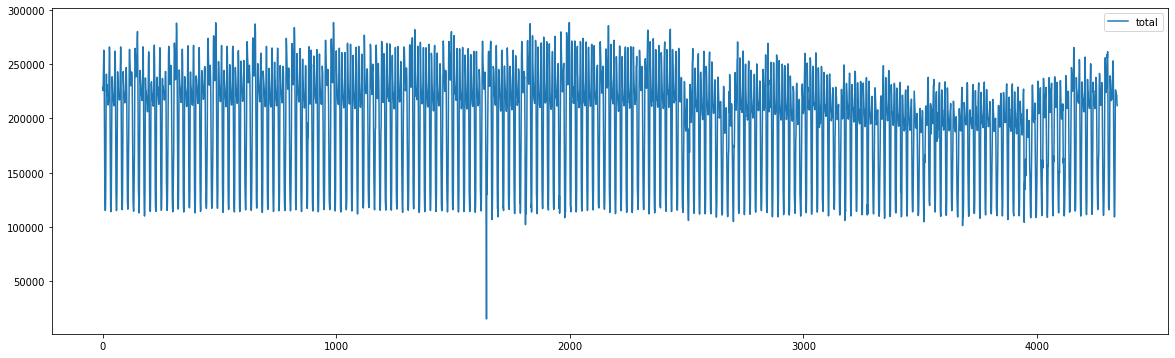

In [252]:
sample.plot(figsize=(20,6))
plt.show()

In [253]:
sample.isna().sum()

datetime    0
total       0
dtype: int64

In [254]:
sample.to_csv('result.csv', index=False)
files.download('result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>